In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [26]:
data_player_stats = pd.read_csv("2022-2023 Football Player Stats.csv", encoding='latin-1', sep=';')
data_player_stats.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


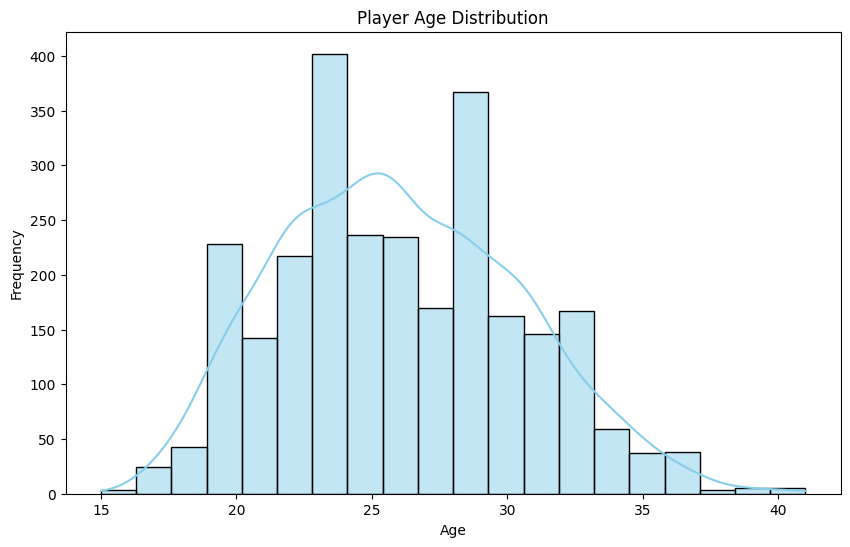

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data_player_stats['Age'], bins=20, kde=True, color='skyblue')
plt.title('Player Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

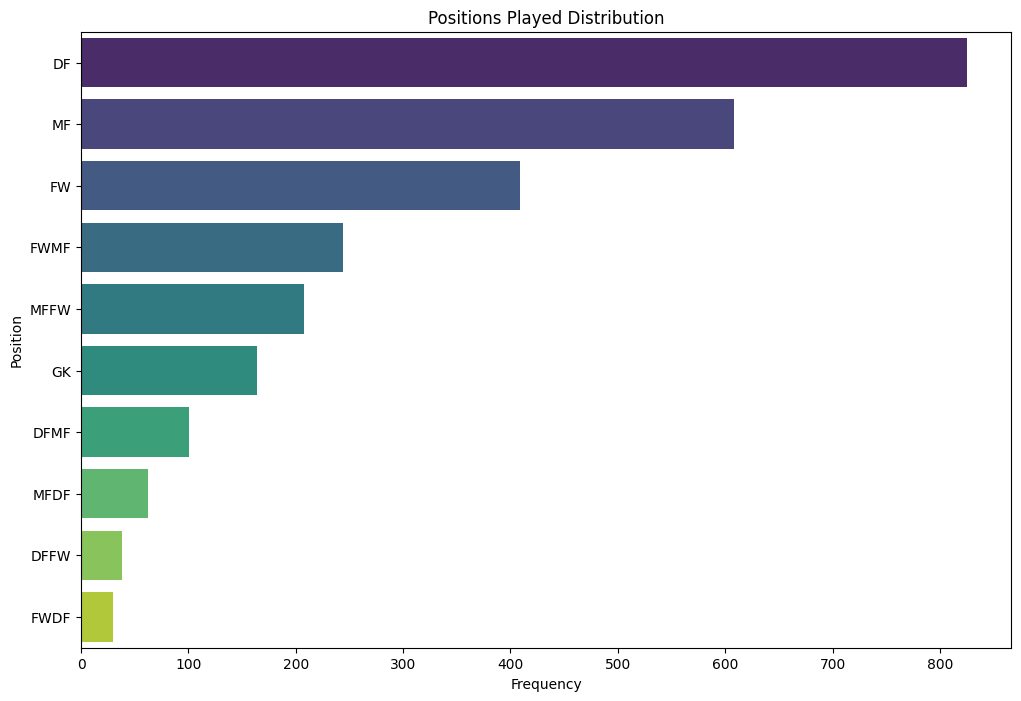

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Pos', data=data_player_stats, order=data_player_stats['Pos'].value_counts().index, palette='viridis')
plt.title('Positions Played Distribution')
plt.xlabel('Frequency')
plt.ylabel('Position')
plt.show()

In [36]:
data_player_stats['Pos'].value_counts()

DF      825
MF      608
FW      409
FWMF    244
MFFW    208
GK      164
DFMF    101
MFDF     62
DFFW     38
FWDF     30
Name: Pos, dtype: int64

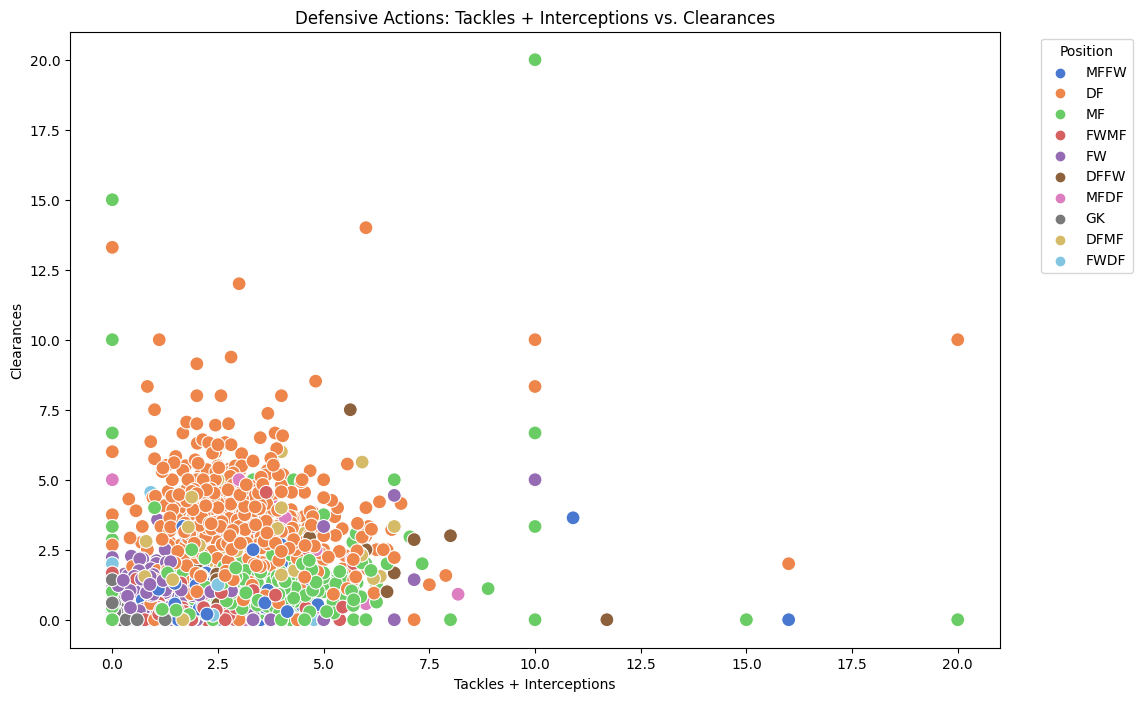

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Tkl+Int', y='Clr', data=data_player_stats, hue='Pos', palette='muted', s=100)
plt.title('Defensive Actions: Tackles + Interceptions vs. Clearances')
plt.xlabel('Tackles + Interceptions')
plt.ylabel('Clearances')
plt.legend(title='Position', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

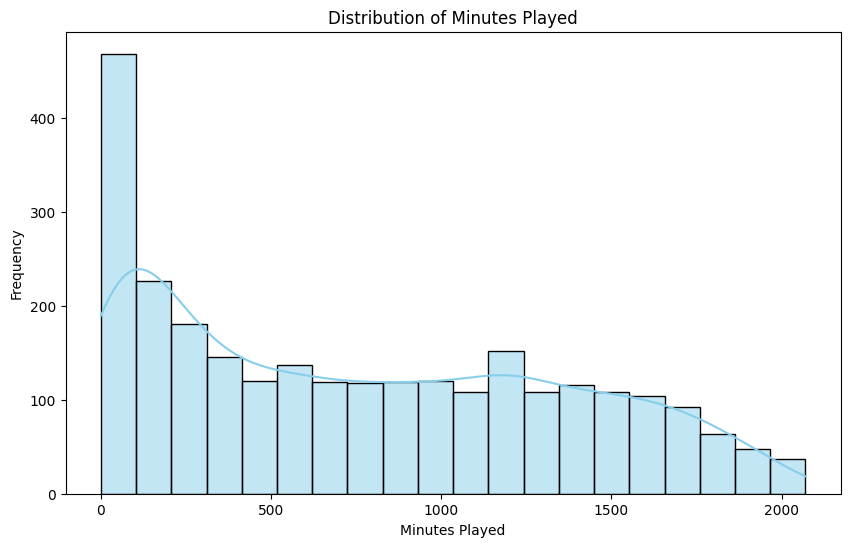

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data_player_stats['Min'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()

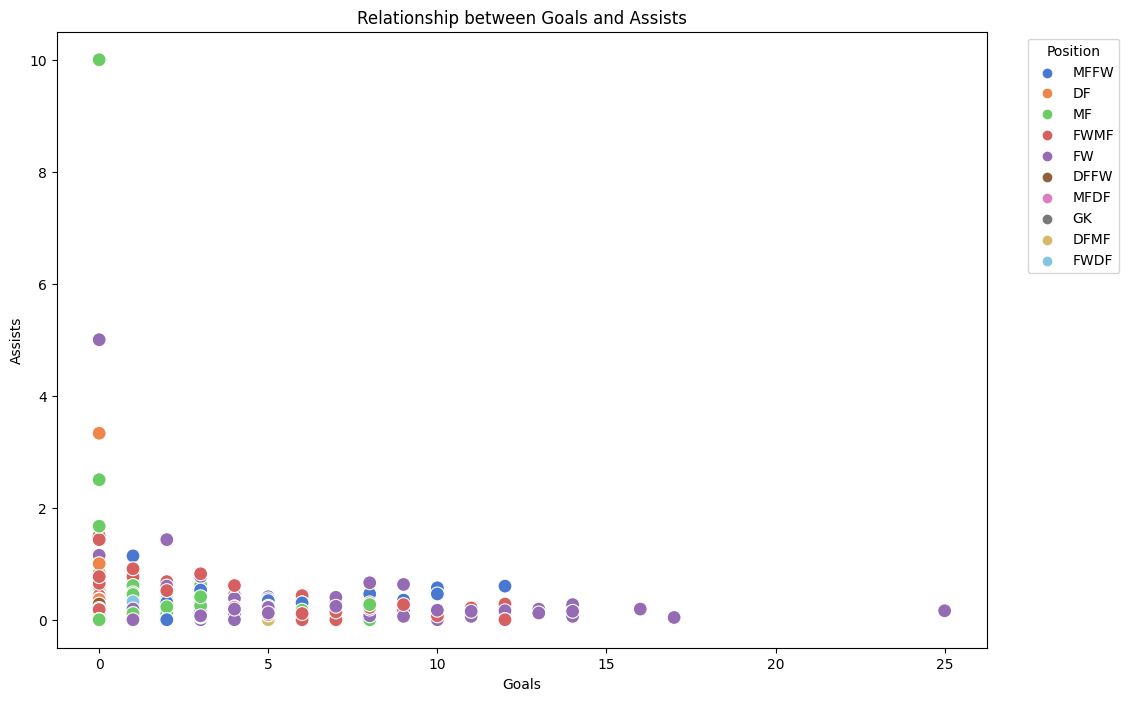

In [53]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Goals', y='Assists', data=data_player_stats, hue='Pos', palette='muted', s=100)
plt.title('Relationship between Goals and Assists')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.legend(title='Position', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [67]:
data_player_injury = pd.read_csv("game_injury_player_2019_2020_complete_final.csv")
data_player_injury.head()

,connector,player_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,Avg_Wind_MPH,Avg_Humidity_Percent,Avg_Percipitation_Prob_Percent,Home_latitude,Home_longitude,Away_latitude,Away_longitude,distance_miles,HOME_day_since_last_game,AWAY_day_since_last_game
0,2019_01_ATL_MIN_Alexander,2019_MIN_20_Alexander,2019_01_ATL_MIN,MIN,ATL,REG,1,ATL,away,MIN,...,3.50,91.25,26.75,44.9746,-93.2598,33.7551,-84.4010,906.980256,0,0
1,2019_01_ATL_MIN_Gage,2019_ATL_83_Gage,2019_01_ATL_MIN,MIN,ATL,REG,1,ATL,away,MIN,...,3.50,91.25,26.75,44.9746,-93.2598,33.7551,-84.4010,906.980256,0,0
2,2019_01_ATL_MIN_McKinley,2019_ATL_98_McKinley,2019_01_ATL_MIN,MIN,ATL,REG,1,MIN,home,ATL,...,3.50,91.25,26.75,44.9746,-93.2598,33.7551,-84.4010,906.980256,0,0
3,2019_01_BAL_MIA_McCain,2019_MIA_28_McCain,2019_01_BAL_MIA,MIA,BAL,REG,1,BAL,away,MIA,...,7.75,65.00,0.00,25.9579,-80.2388,39.3972,-76.8352,949.274391,0,0
4,2019_01_BAL_MIA_McMillan,2019_MIA_52_McMillan,2019_01_BAL_MIA,MIA,BAL,REG,1,MIA,home,BAL,...,7.75,65.00,0.00,25.9579,-80.2388,39.3972,-76.8352,949.274391,0,0


In [68]:
data_player_injury.columns

Index(['connector', 'player_id', 'game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'qtr', 'down', 'yrdln',
       'ydstogo', 'desc', 'injured_first_name', 'injured_last_name',
       'injured_team', 'injured_player_num', 'Contact/ non-contact',
       'injury area', 'player role', 'season', 'team', 'position',
       'depth_chart_position', 'jersey_number', 'status', 'full_name',
       'first_name', 'last_name', 'birth_date', 'height', 'weight', 'college',
       'years_exp', 'game_type', 'football_name', 'smart_id', 'entry_year',
       'week.1', 'day', 'date', 'time', 'winner.tie', 'loser.tie', 'pts_w',
       'pts_l', 'yds_w', 'tov_w', 'yds_l', 'tov_l', 'season.1',
       'loser_is_home', 'Home_Team', 'Away_Team', 'Home_abbr', 'Away_abbr',
       'num_injuries', 'num_pl

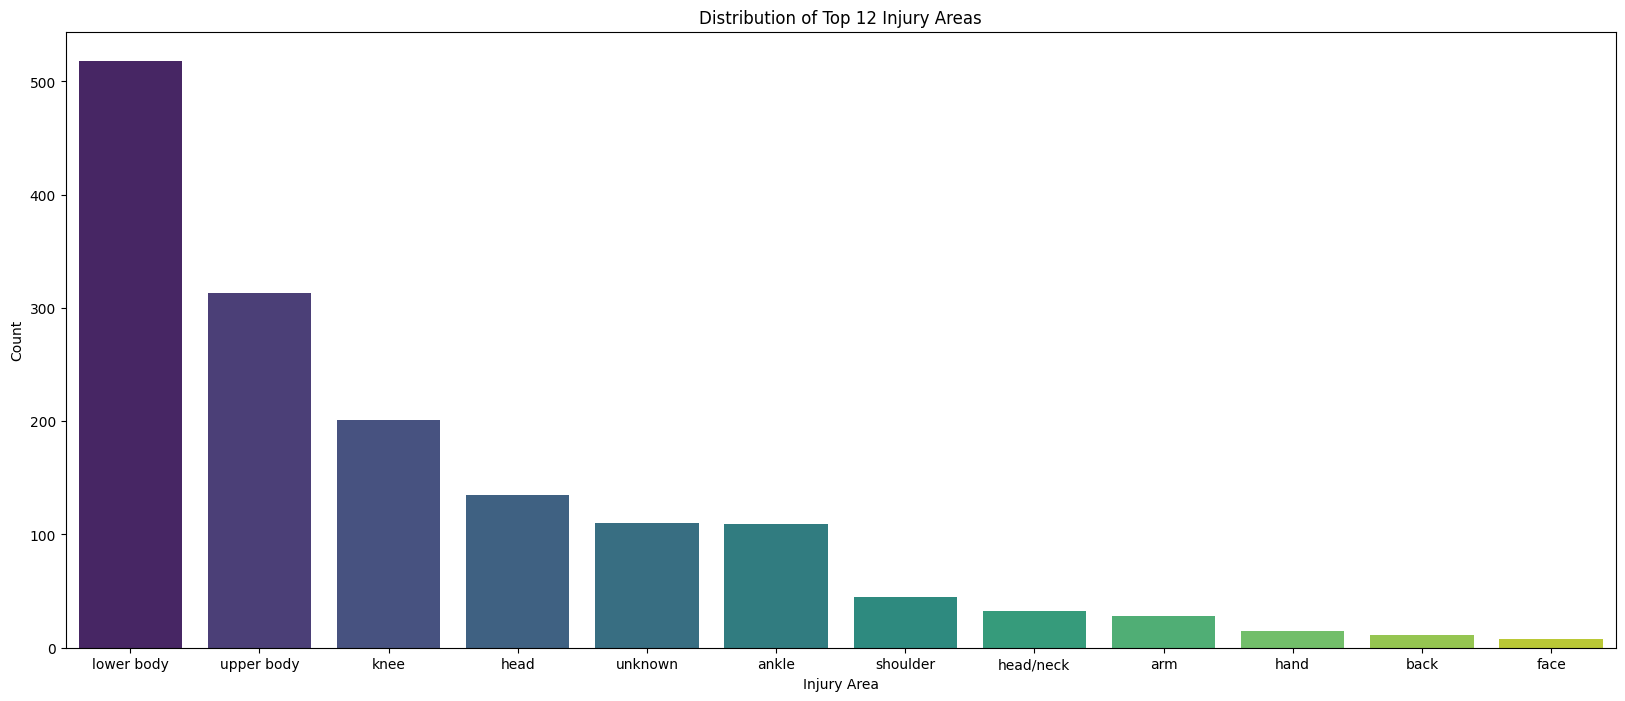

In [77]:
# Injury Types Distribution (Top 12 Areas)
plt.figure(figsize=(20, 8))
top_12_areas = data_player_injury['injury area'].value_counts().nlargest(12).index
sns.countplot(x='injury area', data=data_player_injury[data_player_injury['injury area'].isin(top_12_areas)],
              palette='viridis', order=top_12_areas)
plt.title('Distribution of Top 12 Injury Areas')
plt.xlabel('Injury Area')
plt.ylabel('Count')
plt.show()

In [79]:
data_player_injury['injury area'].value_counts().nlargest(12)

lower body    518
upper body    313
knee          201
head          135
unknown       110
ankle         109
shoulder       45
head/neck      32
arm            28
hand           15
back           11
face            8
Name: injury area, dtype: int64

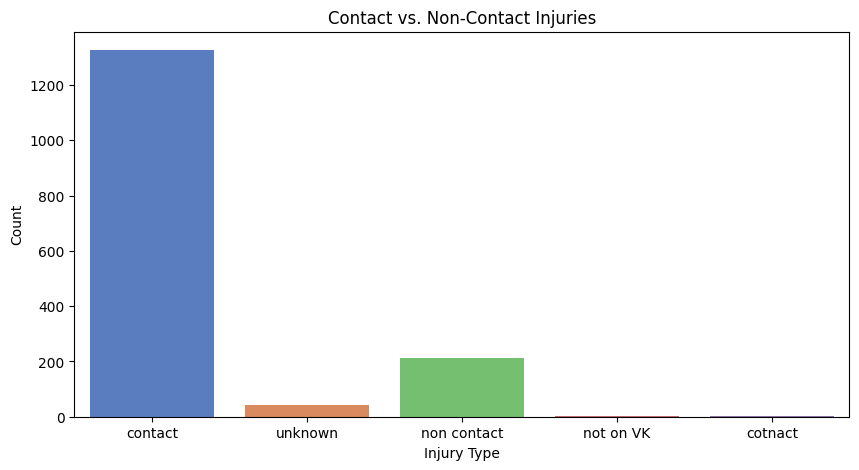

In [83]:
# Contact vs. Non-Contact Injuries
plt.figure(figsize=(10, 5))
sns.countplot(x='Contact/ non-contact', data=data_player_injury, palette='muted')
plt.title('Contact vs. Non-Contact Injuries')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.show()

In [81]:
# Contact vs. Non-Contact Injuries - Value Counts
contact_non_contact_counts = data_player_injury['Contact/ non-contact'].value_counts()
print(contact_non_contact_counts)

contact        1326
non contact     213
unknown          44
cotnact           2
not on VK         1
Name: Contact/ non-contact, dtype: int64


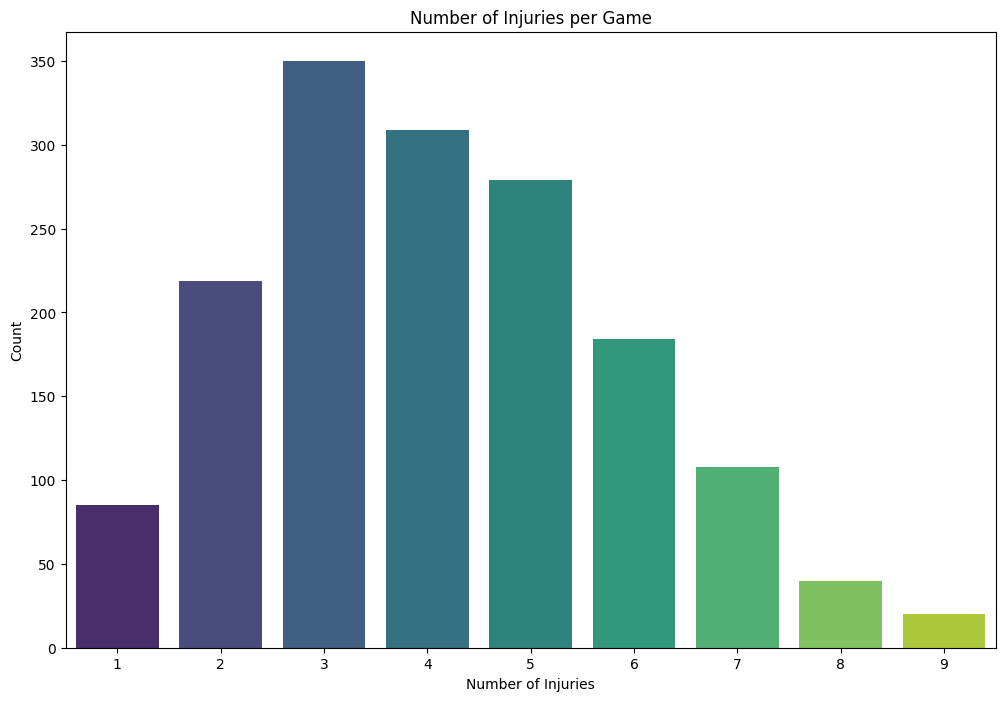

In [87]:
# Number of Injuries per Game
plt.figure(figsize=(12, 8))
sns.countplot(x='num_injuries', data=data_player_injury, palette='viridis')
plt.title('Number of Injuries per Game')
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.show()

In [88]:
# Number of Injuries per Game
injuries_per_game_counts = data_player_injury['num_injuries'].value_counts()
print(injuries_per_game_counts)

3    350
4    309
5    279
2    219
6    184
7    108
1     85
8     40
9     20
Name: num_injuries, dtype: int64


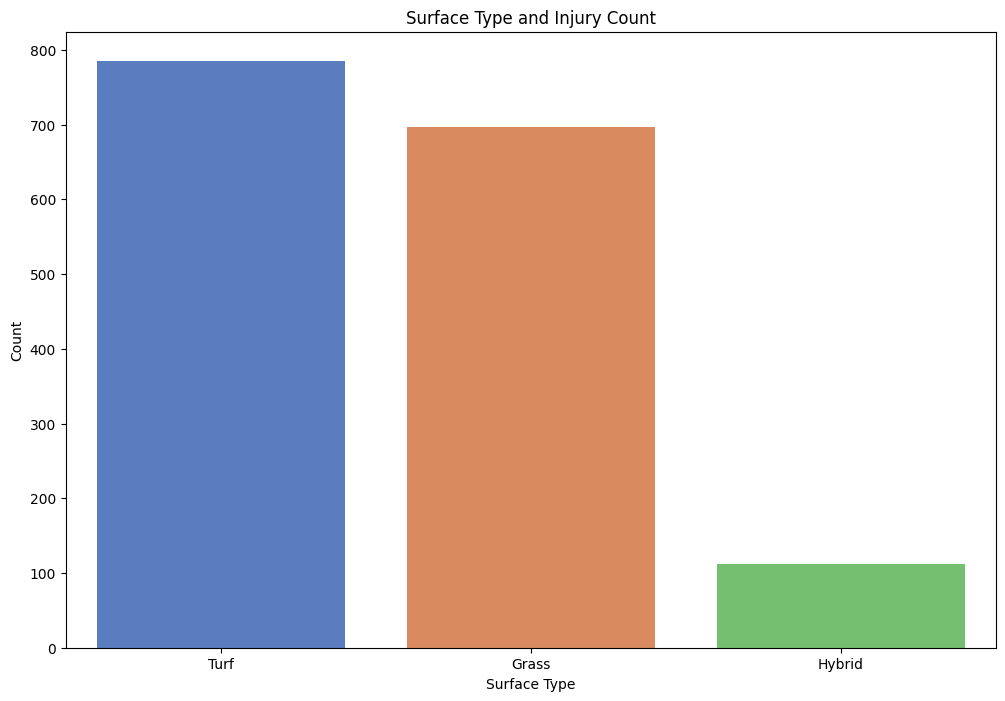

In [90]:
# Surface Type and Injury Count
plt.figure(figsize=(12, 8))
sns.countplot(x='surface_type', data=data_player_injury, palette='muted')
plt.title('Surface Type and Injury Count')
plt.xlabel('Surface Type')
plt.ylabel('Count')
plt.show()

In [91]:
# Surface Type and Injury Count
injury_surface_counts = data_player_injury['surface_type'].value_counts()

print(injury_surface_counts)

Turf      785
Grass     697
Hybrid    112
Name: surface_type, dtype: int64


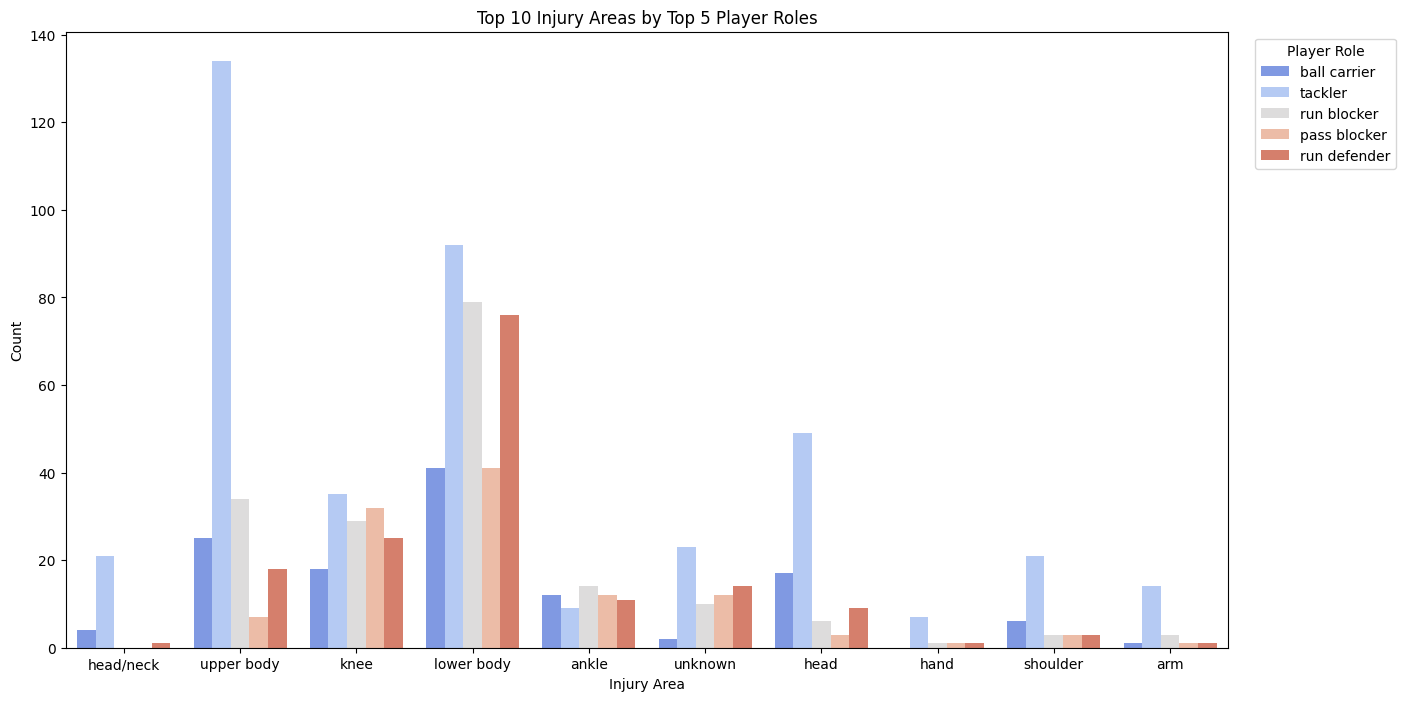

In [93]:
# Top 10 Injury Areas by Player Role
top_injury_areas = data_player_injury['injury area'].value_counts().nlargest(10).index
top_player_roles = data_player_injury['player role'].value_counts().nlargest(5).index

plt.figure(figsize=(15, 8))
sns.countplot(x='injury area', hue='player role', data=data_player_injury[data_player_injury['injury area'].isin(top_injury_areas) & data_player_injury['player role'].isin(top_player_roles)], palette='coolwarm')
plt.title('Top 10 Injury Areas by Top 5 Player Roles')
plt.xlabel('Injury Area')
plt.ylabel('Count')
plt.legend(title='Player Role', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [95]:
# Top 10 Injury Areas by Player Role (with values)
top_injury_areas = data_player_injury['injury area'].value_counts().nlargest(10).index
top_player_roles = data_player_injury['player role'].value_counts().nlargest(5).index

selected_data = data_player_injury[data_player_injury['injury area'].isin(top_injury_areas) & data_player_injury['player role'].isin(top_player_roles)]

# Print values
for p in selected_data['injury area'].unique():
    for r in selected_data['player role'].unique():
        count = selected_data[(selected_data['injury area'] == p) & (selected_data['player role'] == r)].shape[0]
        print(f"Injury Area: {p}, Player Role: {r}, Count: {count}")


Injury Area: head/neck, Player Role: ball carrier, Count: 4
Injury Area: head/neck, Player Role: tackler, Count: 21
Injury Area: head/neck, Player Role: run blocker, Count: 0
Injury Area: head/neck, Player Role: pass blocker, Count: 0
Injury Area: head/neck, Player Role: run defender, Count: 1
Injury Area: upper body, Player Role: ball carrier, Count: 25
Injury Area: upper body, Player Role: tackler, Count: 134
Injury Area: upper body, Player Role: run blocker, Count: 34
Injury Area: upper body, Player Role: pass blocker, Count: 7
Injury Area: upper body, Player Role: run defender, Count: 18
Injury Area: knee, Player Role: ball carrier, Count: 18
Injury Area: knee, Player Role: tackler, Count: 35
Injury Area: knee, Player Role: run blocker, Count: 29
Injury Area: knee, Player Role: pass blocker, Count: 32
Injury Area: knee, Player Role: run defender, Count: 25
Injury Area: lower body, Player Role: ball carrier, Count: 41
Injury Area: lower body, Player Role: tackler, Count: 92
Injury A

In [97]:
data = pd.read_csv("final_dataset.csv")
data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


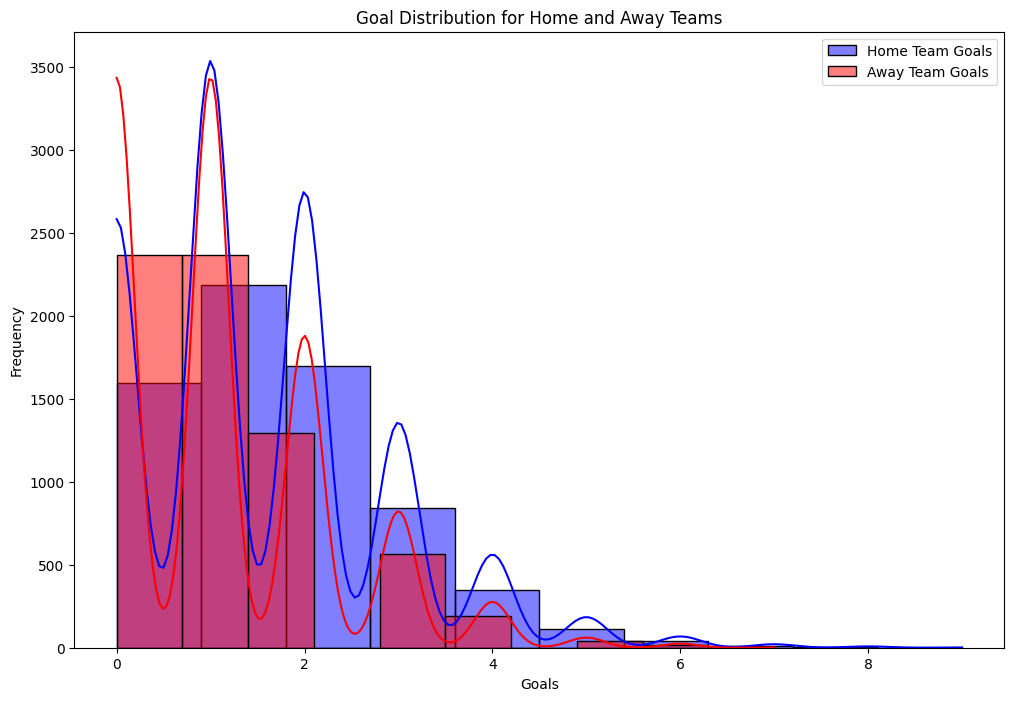

In [99]:
plt.figure(figsize=(12, 8))
sns.histplot(data['FTHG'], bins=10, kde=True, label='Home Team Goals', color='blue')
sns.histplot(data['FTAG'], bins=10, kde=True, label='Away Team Goals', color='red')
plt.title('Goal Distribution for Home and Away Teams')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [101]:
home_team_goals_distribution = data['FTHG'].value_counts().sort_index()
away_team_goals_distribution = data['FTAG'].value_counts().sort_index()

print("Home Team Goals Distribution:")
print(home_team_goals_distribution)

print("\nAway Team Goals Distribution:")
print(away_team_goals_distribution)

Home Team Goals Distribution:
0    1596
1    2185
2    1698
3     839
4     347
5     114
6      42
7      13
8       5
9       1
Name: FTHG, dtype: int64

Away Team Goals Distribution:
0    2364
1    2366
2    1294
3     566
4     190
5      42
6      17
7       1
Name: FTAG, dtype: int64


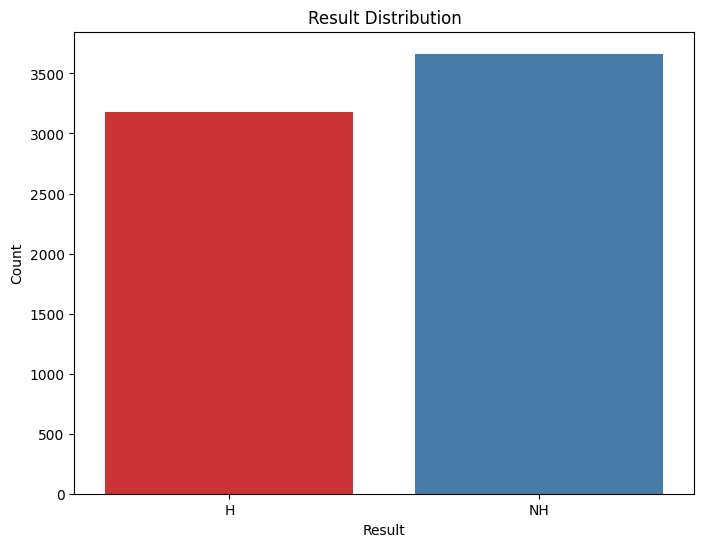

In [102]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FTR', data=data, palette='Set1')
plt.title('Result Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [103]:
# Result Distribution
result_distribution = data['FTR'].value_counts()

print("Result Distribution:")
print(result_distribution)

Result Distribution:
NH    3664
H     3176
Name: FTR, dtype: int64


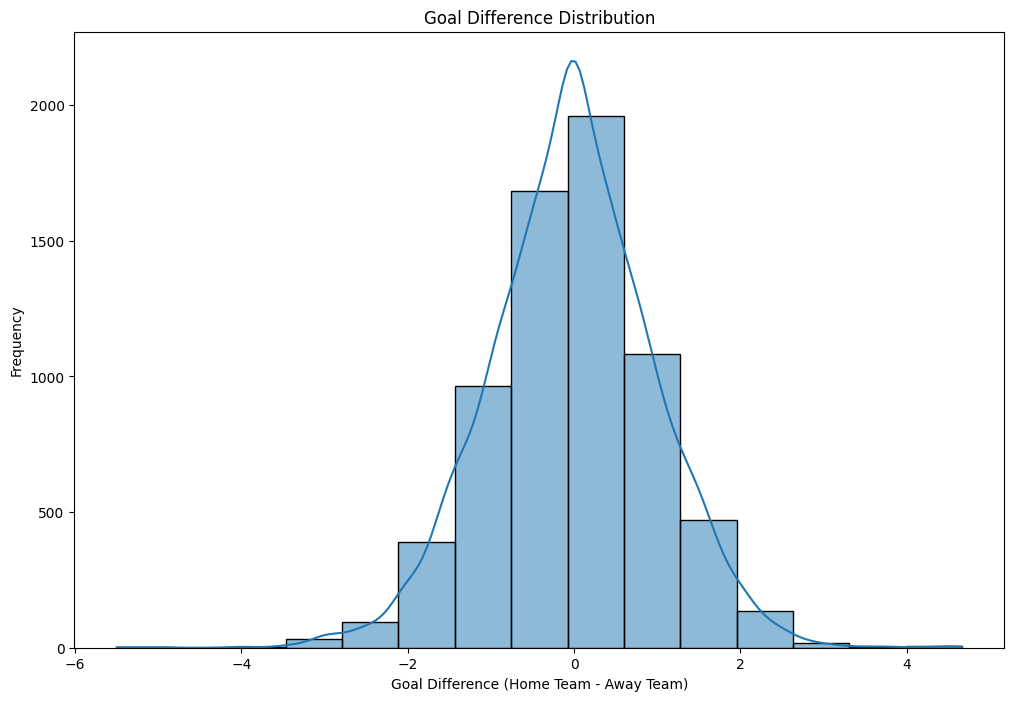

In [104]:
plt.figure(figsize=(12, 8))
sns.histplot(data['HTGD'] - data['ATGD'], bins=15, kde=True)
plt.title('Goal Difference Distribution')
plt.xlabel('Goal Difference (Home Team - Away Team)')
plt.ylabel('Frequency')
plt.show()

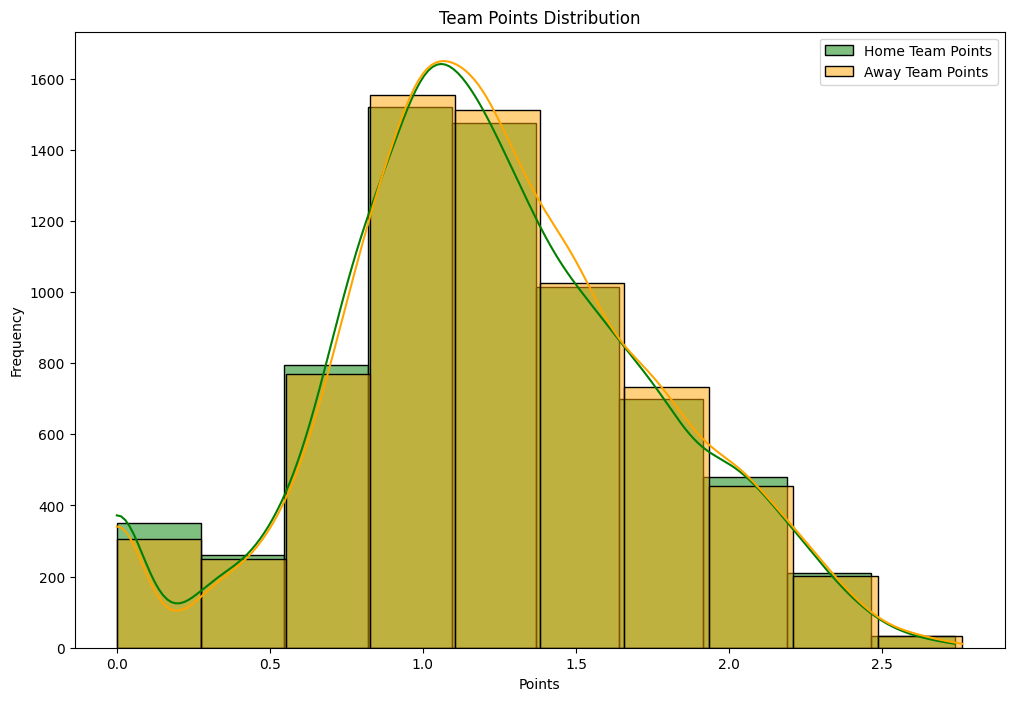

In [100]:
plt.figure(figsize=(12, 8))
sns.histplot(data['HTP'], bins=10, kde=True, label='Home Team Points', color='green')
sns.histplot(data['ATP'], bins=10, kde=True, label='Away Team Points', color='orange')
plt.title('Team Points Distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend()
plt.show()

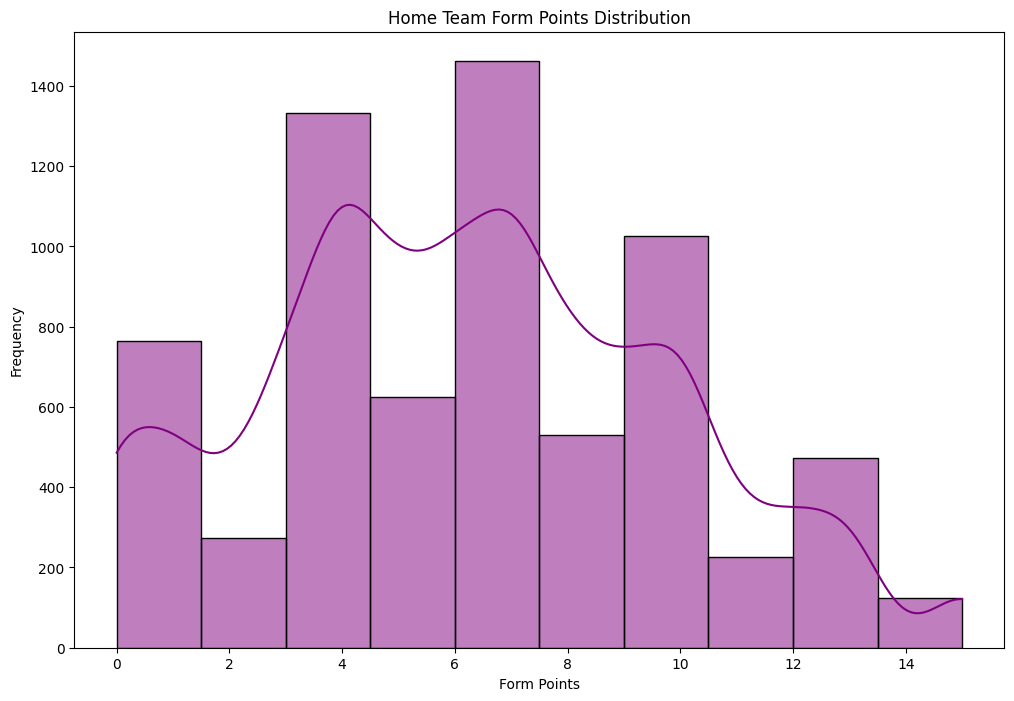

In [105]:
plt.figure(figsize=(12, 8))
sns.histplot(data['HTFormPts'], bins=10, kde=True, color='purple')
plt.title('Home Team Form Points Distribution')
plt.xlabel('Form Points')
plt.ylabel('Frequency')
plt.show()

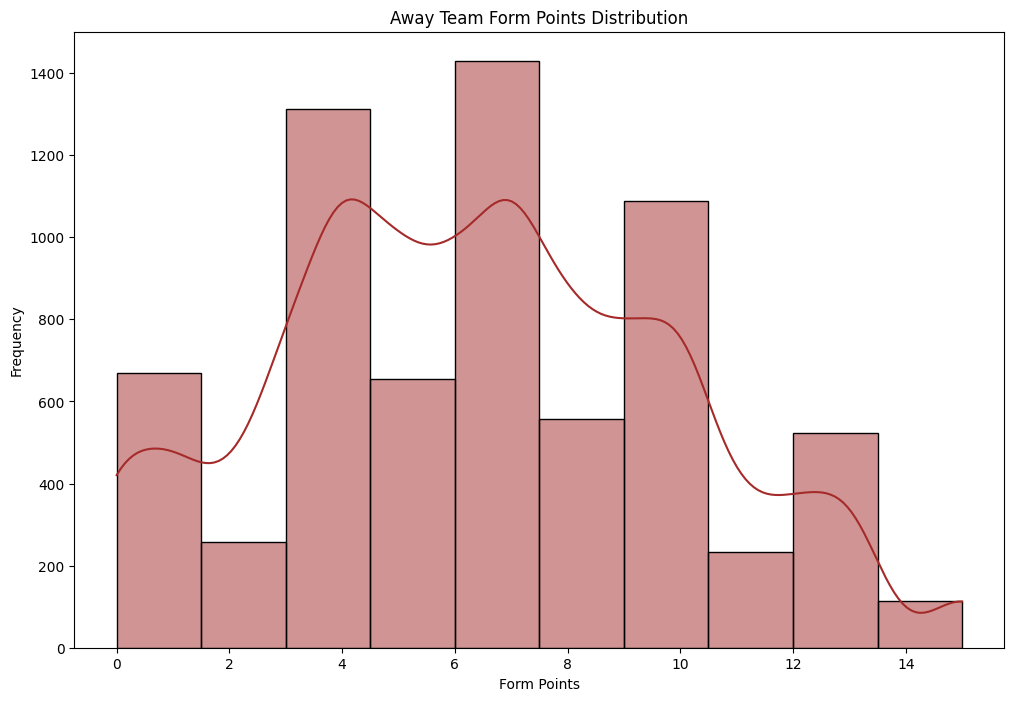

In [107]:
plt.figure(figsize=(12, 8))
sns.histplot(data['ATFormPts'], bins=10, kde=True, color='brown')
plt.title('Away Team Form Points Distribution')
plt.xlabel('Form Points')
plt.ylabel('Frequency')
plt.show()

In [110]:
# Goal Difference Distribution
goal_difference = data['HTGD'] - data['ATGD']
goal_difference_stats = goal_difference.describe()

# Team Points Distribution
home_team_points_stats = data['HTP'].describe()
away_team_points_stats = data['ATP'].describe()

# Home Team Form Points Distribution
home_team_form_points_stats = data['HTFormPts'].describe()

# Away Team Form Points Distribution
away_team_form_points_stats = data['ATFormPts'].describe()

print("Goal Difference Statistics:")
print(goal_difference_stats)

print("\nHome Team Points Statistics:")
print(home_team_points_stats)

print("\nAway Team Points Statistics:")
print(away_team_points_stats)

print("\nHome Team Form Points Statistics:")
print(home_team_form_points_stats)

print("\nAway Team Form Points Statistics:")
print(away_team_form_points_stats)

Goal Difference Statistics:
count    6840.000000
mean       -0.024229
std         0.989003
min        -5.500000
25%        -0.645636
50%         0.000000
75%         0.608696
max         4.666667
dtype: float64

Home Team Points Statistics:
count    6840.000000
mean        1.209014
std         0.530186
min         0.000000
25%         0.888889
50%         1.172414
75%         1.555556
max         2.736842
Name: HTP, dtype: float64

Away Team Points Statistics:
count    6840.000000
mean        1.226768
std         0.523176
min         0.000000
25%         0.906250
50%         1.192308
75%         1.562500
max         2.761905
Name: ATP, dtype: float64

Home Team Form Points Statistics:
count    6840.000000
mean        6.242690
std         3.582486
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        15.000000
Name: HTFormPts, dtype: float64

Away Team Form Points Statistics:
count    6840.000000
mean        6.413596
std         3.549762
min     

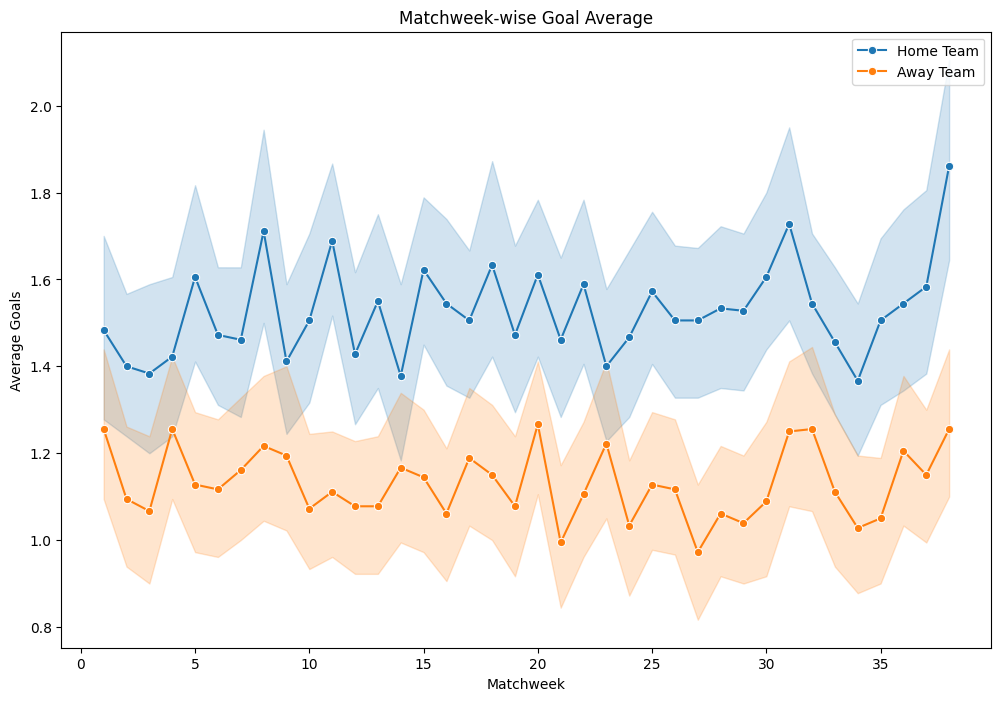

In [108]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='MW', y='FTHG', data=data, label='Home Team', marker='o')
sns.lineplot(x='MW', y='FTAG', data=data, label='Away Team', marker='o')
plt.title('Matchweek-wise Goal Average')
plt.xlabel('Matchweek')
plt.ylabel('Average Goals')
plt.legend()
plt.show()

<ipython-input-112-57795270da22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


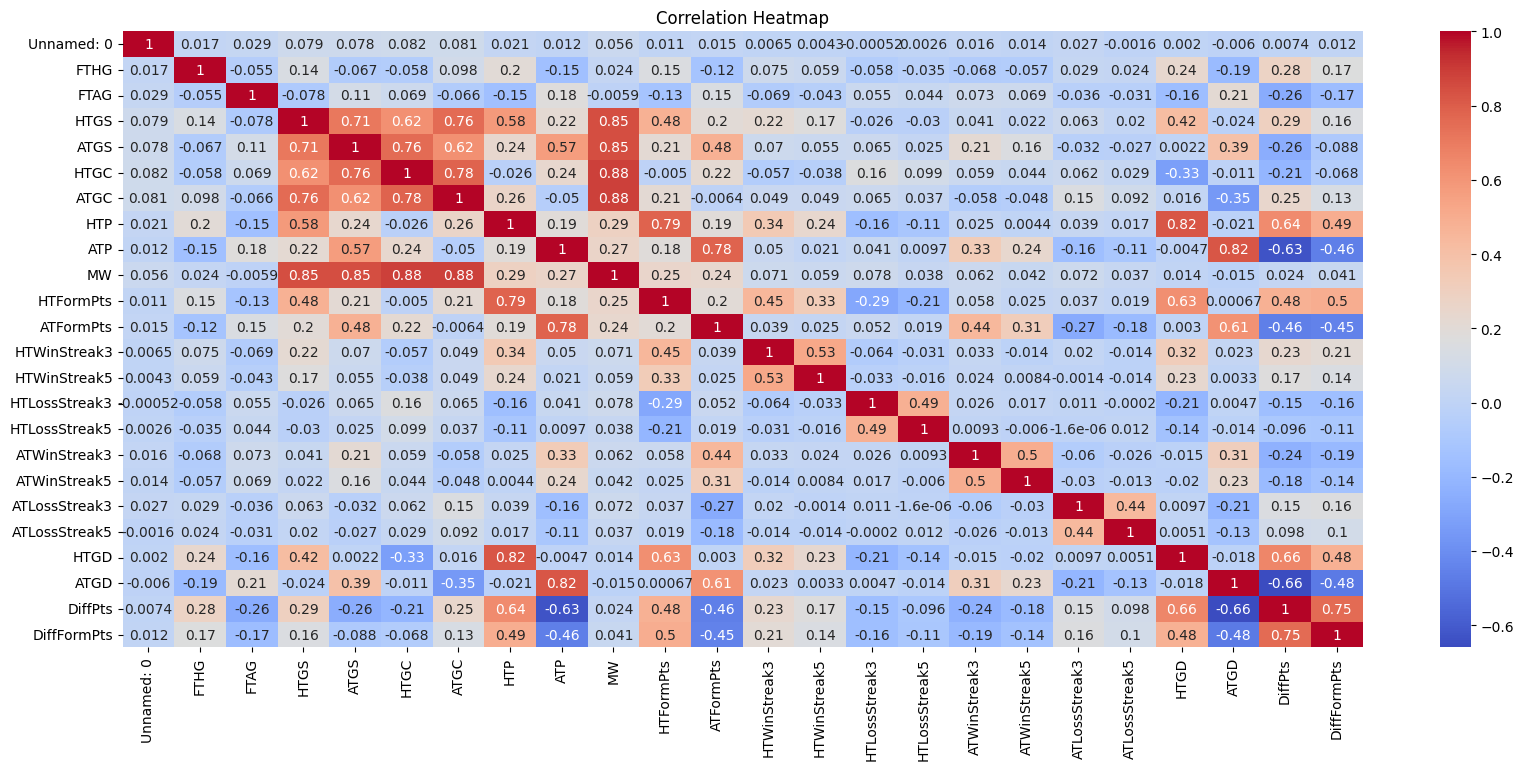

In [112]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [118]:
columns_to_drop = ['HomeTeam', 'AwayTeam', 'HTFormPtsStr', 'ATFormPtsStr']
data = data.drop(columns=columns_to_drop)

In [119]:
data.isnull().sum()

Unnamed: 0       0
Date             0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64

In [122]:
data = data.drop("Unnamed: 0", axis=1)

In [123]:
# Filter columns with object data type (categorical)
categorical_columns = data.select_dtypes(include=['object']).columns

# Iterate through categorical columns and print unique values
for column in categorical_columns:
    print(f"{column}: {data[column].unique()}")

Date: ['19/08/00' '20/08/00' '21/08/00' ... '09/05/18' '10/05/18' '13/05/18']
FTR: ['H' 'NH']
HM1: ['M' 'L' 'W' 'D']
HM2: ['M' 'L' 'W' 'D']
HM3: ['M' 'W' 'L' 'D']
HM4: ['M' 'L' 'D' 'W']
HM5: ['M' 'D' 'W' 'L']
AM1: ['M' 'W' 'D' 'L']
AM2: ['M' 'D' 'W' 'L']
AM3: ['M' 'L' 'D' 'W']
AM4: ['M' 'W' 'D' 'L']
AM5: ['M' 'L' 'W' 'D']


In [133]:
data = data.drop("Date", axis=1)

In [128]:
# List of columns to label encode
columns_to_encode = ['FTR', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [129]:
encoded_columns = ['FTR', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5']

for col in encoded_columns:
    print(f"{col}: {data[col].unique()}")

FTR: [0 1]
HM1: [2 1 3 0]
HM2: [2 1 3 0]
HM3: [2 3 1 0]
HM4: [2 1 0 3]
HM5: [2 0 3 1]
AM1: [2 3 0 1]
AM2: [2 0 3 1]
AM3: [2 1 0 3]
AM4: [2 3 0 1]
AM5: [2 1 3 0]


In [136]:
# selecting FTR as the target variable
X = data.drop('FTR', axis=1)  # Features
y = data['FTR']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.head(25))

Top Features:
        Feature  Importance
0          FTHG    0.394194
1          FTAG    0.249808
31      DiffPts    0.035997
29         HTGD    0.028796
30         ATGD    0.028603
32  DiffFormPts    0.028276
7           ATP    0.027054
6           HTP    0.024969
2          HTGS    0.018468
3          ATGS    0.017907
5          ATGC    0.017577
4          HTGC    0.017532
20    ATFormPts    0.014596
18           MW    0.014573
19    HTFormPts    0.014501
8           HM1    0.009312
13          AM1    0.007457
10          HM3    0.005749
9           HM2    0.005740
11          HM4    0.005651
14          AM2    0.005623
15          AM3    0.005616
12          HM5    0.005445
17          AM5    0.005426
16          AM4    0.005274


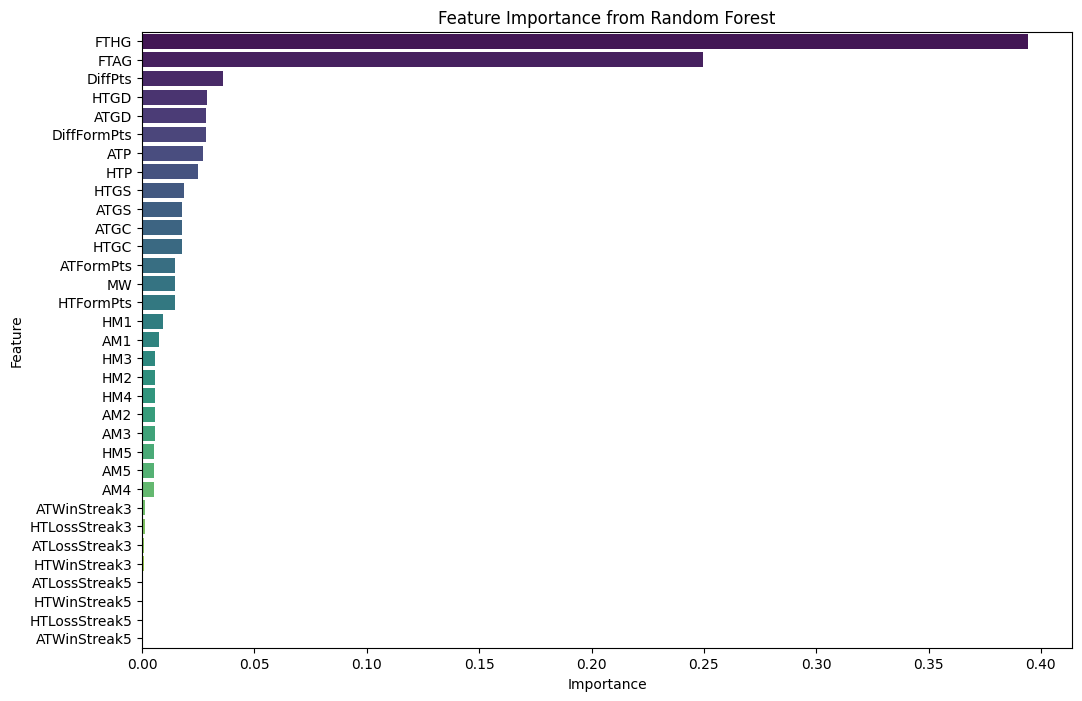

In [135]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [137]:
# Select the top N features (adjust N based on your preference)
top_features = feature_importance_df['Feature'].head(25).tolist()

# Subset the data with the selected features
X_selected = X[top_features]

In [138]:
X_selected.shape

(6840, 25)

In [141]:
# Define the features and target variable
X = data[top_features]
y = data['FTR']

# Split the data into training and testing sets using 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape - X:", X_train.shape, "y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, "y:", y_test.shape)


Training set shape - X: (5130, 25) y: (5130,)
Testing set shape - X: (1710, 25) y: (1710,)


In [144]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)  # Increase the max_iter value
logistic_model.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# k-Nearest Neighbors (KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Feedforward Neural Network using TensorFlow/Keras
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
161/161 [==============================] - 1s 4ms/step - loss: 0.5530 - accuracy: 0.7684 - val_loss: 0.2693 - val_accuracy: 0.9216
Epoch 2/10
161/161 [==============================] - 0s 3ms/step - loss: 0.1745 - accuracy: 0.9474 - val_loss: 0.1074 - val_accuracy: 0.9825
Epoch 3/10
161/161 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.9756 - val_loss: 0.0532 - val_accuracy: 0.9994
Epoch 4/10
161/161 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9998 - val_loss: 0.0236 - val_accuracy: 0.9994
Epoch 5/10
161/161 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9994 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 6/10
161/161 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 7/10
161/161 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 

In [146]:
# Logistic Regression
logistic_preds = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_preds)

# Random Forest
random_forest_preds = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)

# k-Nearest Neighbors (KNN)
knn_preds = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_preds)

# Feedforward Neural Network
nn_preds = (model.predict(X_test) > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, nn_preds)

# Displaying accuracies in a table
import pandas as pd

accuracy_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'k-Nearest Neighbors', 'Neural Network'],
    'Accuracy': [logistic_accuracy, random_forest_accuracy, knn_accuracy, nn_accuracy]
})

print(accuracy_table)

54/54 [==============================] - 0s 3ms/step
                 Model  Accuracy
0  Logistic Regression  1.000000
1        Random Forest  0.996491
2  k-Nearest Neighbors  0.801170
3       Neural Network  1.000000


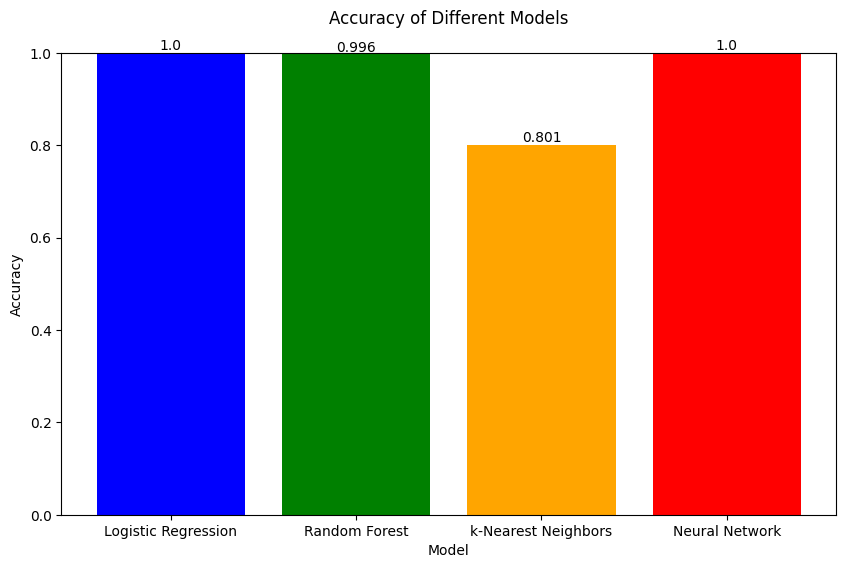

In [149]:
# Plotting bar plot
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(accuracy_table['Model'], accuracy_table['Accuracy'], color=['blue', 'green', 'orange', 'red'])

# Adding accuracy annotations on top of each bar
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models\n')
plt.ylim(0, 1)  # Setting y-axis limit to ensure accurate annotations
plt.show()

Logistic Regression Confusion Matrix:
[[795   0]
 [  0 915]]


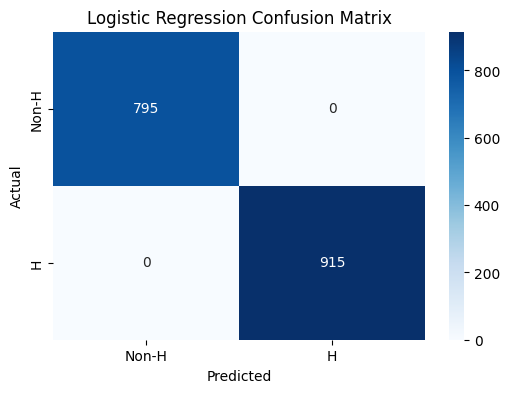


Random Forest Confusion Matrix:
[[794   1]
 [  5 910]]


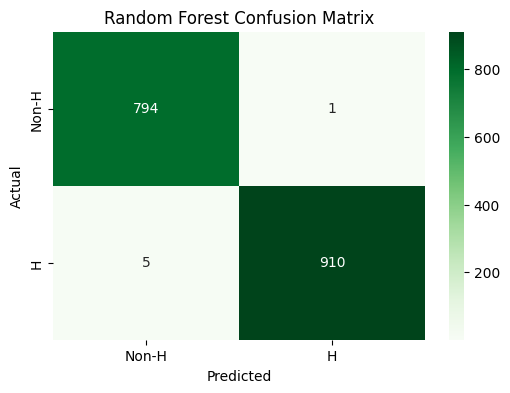


k-Nearest Neighbors Confusion Matrix:
[[613 182]
 [158 757]]


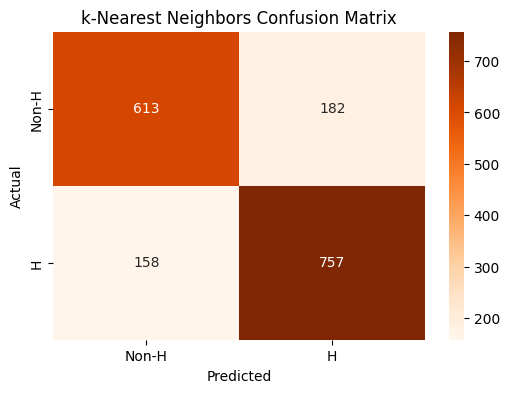

54/54 [==============================] - 0s 3ms/step

Neural Network Confusion Matrix:
[[795   0]
 [  0 915]]


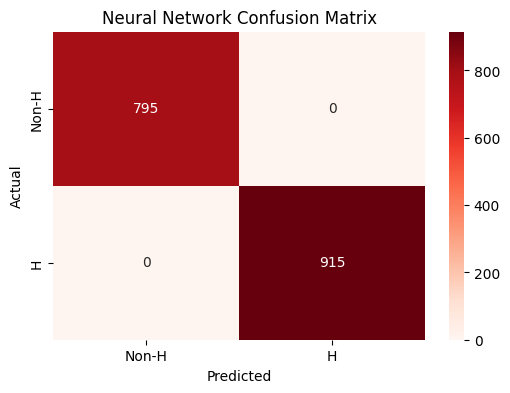

In [151]:
# Evaluate Logistic Regression
logistic_preds = logistic_model.predict(X_test)
logistic_cm = confusion_matrix(y_test, logistic_preds)
print("Logistic Regression Confusion Matrix:")
print(logistic_cm)

# Plot Logistic Regression Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(logistic_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Non-H', 'H'], yticklabels=['Non-H', 'H'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate Random Forest
rf_preds = random_forest_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_preds)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)

# Plot Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='g', xticklabels=['Non-H', 'H'], yticklabels=['Non-H', 'H'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate k-Nearest Neighbors (KNN)
knn_preds = knn_model.predict(X_test_scaled)
knn_cm = confusion_matrix(y_test, knn_preds)
print("\nk-Nearest Neighbors Confusion Matrix:")
print(knn_cm)

# Plot k-Nearest Neighbors Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, cmap='Oranges', fmt='g', xticklabels=['Non-H', 'H'], yticklabels=['Non-H', 'H'])
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate Neural Network
nn_preds = (model.predict(X_test) > 0.5).astype('int')
nn_cm = confusion_matrix(y_test, nn_preds)
print("\nNeural Network Confusion Matrix:")
print(nn_cm)

# Plot Neural Network Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(nn_cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Non-H', 'H'], yticklabels=['Non-H', 'H'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [153]:
# Evaluate Logistic Regression
logistic_precision = precision_score(y_test, logistic_preds)
logistic_recall = recall_score(y_test, logistic_preds)
logistic_f1 = f1_score(y_test, logistic_preds)

print("Logistic Regression Metrics:")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")
print(f"F1 Score: {logistic_f1:.4f}")

# Evaluate Random Forest
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

print("\nRandom Forest Metrics:")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

# Evaluate k-Nearest Neighbors (KNN)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)
knn_f1 = f1_score(y_test, knn_preds)

print("\nk-Nearest Neighbors Metrics:")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}")

# Evaluate Neural Network
nn_precision = precision_score(y_test, nn_preds)
nn_recall = recall_score(y_test, nn_preds)
nn_f1 = f1_score(y_test, nn_preds)

print("\nNeural Network Metrics:")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"F1 Score: {nn_f1:.4f}")

Logistic Regression Metrics:
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Random Forest Metrics:
Precision: 0.9989
Recall: 0.9945
F1 Score: 0.9967

k-Nearest Neighbors Metrics:
Precision: 0.8062
Recall: 0.8273
F1 Score: 0.8166

Neural Network Metrics:
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


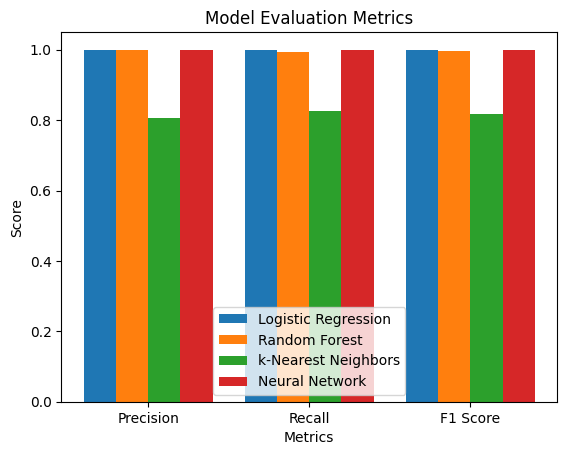

In [155]:
# Define metrics and corresponding values
metrics = ['Precision', 'Recall', 'F1 Score']
logistic_values = [logistic_precision, logistic_recall, logistic_f1]
rf_values = [rf_precision, rf_recall, rf_f1]
knn_values = [knn_precision, knn_recall, knn_f1]
nn_values = [nn_precision, nn_recall, nn_f1]

# Create a bar plot
bar_width = 0.2
index = np.arange(len(metrics))

plt.bar(index, logistic_values, width=bar_width, label='Logistic Regression', align='center')
plt.bar(index + bar_width, rf_values, width=bar_width, label='Random Forest', align='center')
plt.bar(index + 2 * bar_width, knn_values, width=bar_width, label='k-Nearest Neighbors', align='center')
plt.bar(index + 3 * bar_width, nn_values, width=bar_width, label='Neural Network', align='center')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.xticks(index + 1.5 * bar_width, metrics)
plt.legend()

# Show the plot
plt.show()